In [4]:
# Common imports
import numpy as np
from pprint import pprint

# to make this notebook's output stable across runs
np.random.seed(42)

# sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_validate, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# scipy
from scipy.stats import loguniform

# plotting imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# global settings
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(8,6))

In [6]:
# Ignore all warnings (convergence..) by sklearn
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [7]:
from sklearn.datasets import fetch_openml

X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)

In [8]:
X = X_pd.to_numpy()
y = y_pd.to_numpy()

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

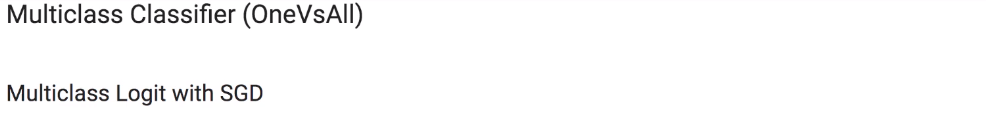

In [12]:
estimator = SGDClassifier(loss='log',
                         penalty='l2',
                         max_iter=1,
                         warm_start=True,
                         eta0=0.01,
                         alpha=0,
                         learning_rate='constant',
                         random_state=1729)
pipe_sgd_ovr = make_pipeline(MinMaxScaler(), estimator)

In [13]:
Loss = []
iterations = 100
for i in range(iterations):
    pipe_sgd_ovr.fit(X_train, y_train)
    y_pred = pipe_sgd_ovr.predict_proba(X_train)
    Loss.append(log_loss(y_train, y_pred))

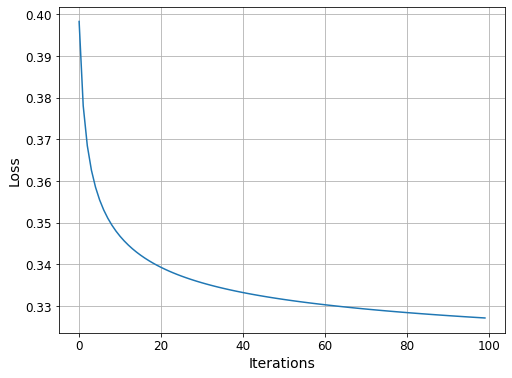

In [14]:
plt.figure()
plt.plot(np.arange(iterations), Loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.show()

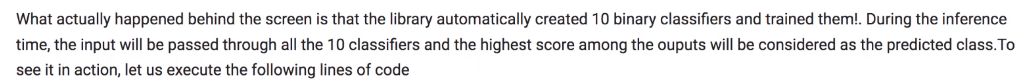

In [15]:
pipe_sgd_ovr[1]

SGDClassifier(alpha=0, eta0=0.01, learning_rate='constant', loss='log',
              max_iter=1, random_state=1729, warm_start=True)

In [16]:
pipe_sgd_ovr[1].coef_.shape

(10, 784)

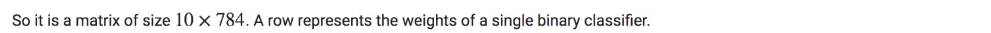

In [17]:
y_hat = pipe_sgd_ovr.predict(X_test)
y_hat[:5]

array(['7', '2', '1', '0', '4'], dtype='<U1')

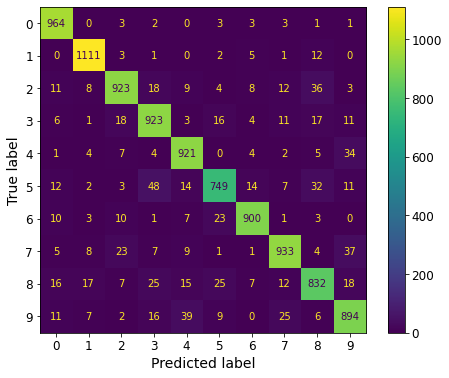

In [18]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_hat, values_format='.5g')

In [19]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.88      0.91      0.90      1010
           4       0.91      0.94      0.92       982
           5       0.90      0.84      0.87       892
           6       0.95      0.94      0.95       958
           7       0.93      0.91      0.92      1028
           8       0.88      0.85      0.87       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.92      0.91     10000



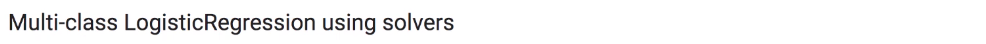

In [20]:
pipe_logit_ovr = make_pipeline(MinMaxScaler(), 
                            LogisticRegression(random_state=1729,
                                              solver='lbfgs',
                                              C=np.infty))
pipe_logit_ovr.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=inf, random_state=1729))])

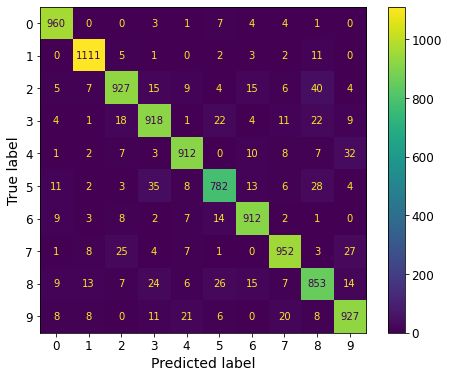

In [21]:
y_hat = pipe_logit_ovr.predict(X_test)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_hat, values_format='.5g')

In [22]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



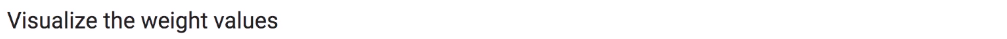

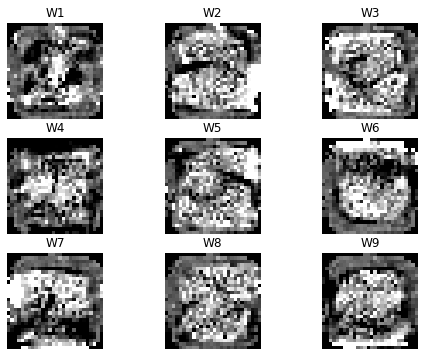

In [23]:
W = pipe_logit_ovr[1].coef_

# normalize
W = MinMaxScaler().fit_transform(W)
fig, ax = plt.subplots(3, 3)
index = 1

for i in range(3):
    for j in range(3):
        ax[i][j].imshow(W[index, :].reshape(28,28), cmap='gray')
        ax[i][j].set_title('W{0}'.format(index))
        ax[i][j].set_axis_off()
        index+= 1